<a href="https://colab.research.google.com/github/shriyapalkar/hands_on-data-science-projects/blob/main/Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

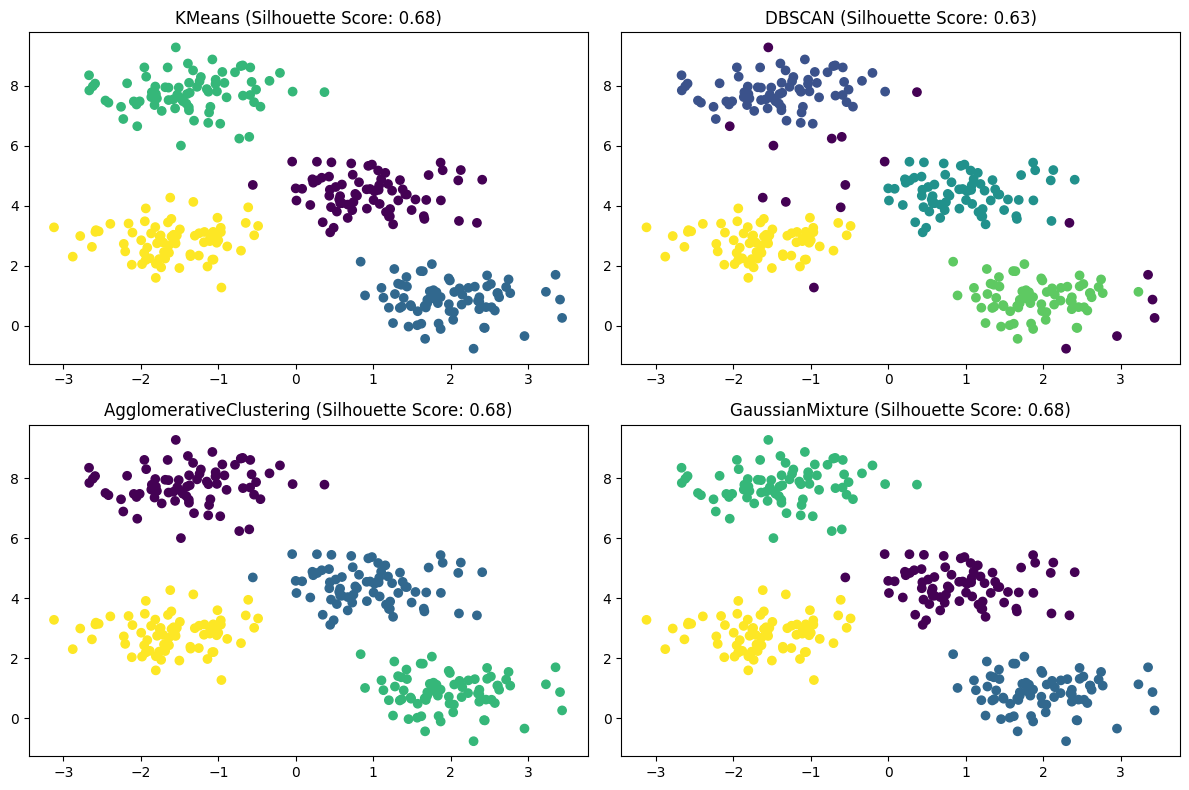

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# clustering
def cluster_and_evaluate(X, algorithm, **kwargs):
    model = algorithm(**kwargs)
    labels = model.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    return labels, silhouette


algorithms = {
    "KMeans": (KMeans, {"n_clusters": 4, "random_state": 0}),
    "DBSCAN": (DBSCAN, {"eps": 0.5, "min_samples": 5}),
    "AgglomerativeClustering": (AgglomerativeClustering, {"n_clusters": 4}),
    "GaussianMixture": (GaussianMixture, {"n_components": 4, "random_state": 0}),
}


results = {}
for name, (algorithm, params) in algorithms.items():
    labels, silhouette = cluster_and_evaluate(X, algorithm, **params)
    results[name] = {"labels": labels, "silhouette_score": silhouette}

# Plotting the results
plt.figure(figsize=(12, 8))
for i, (name, result) in enumerate(results.items()):
  plt.subplot(2, 2, i + 1)
  plt.scatter(X[:, 0], X[:, 1], c=result["labels"])
  plt.title(f"{name} (Silhouette Score: {result['silhouette_score']:.2f})")


plt.tight_layout()
plt.show()


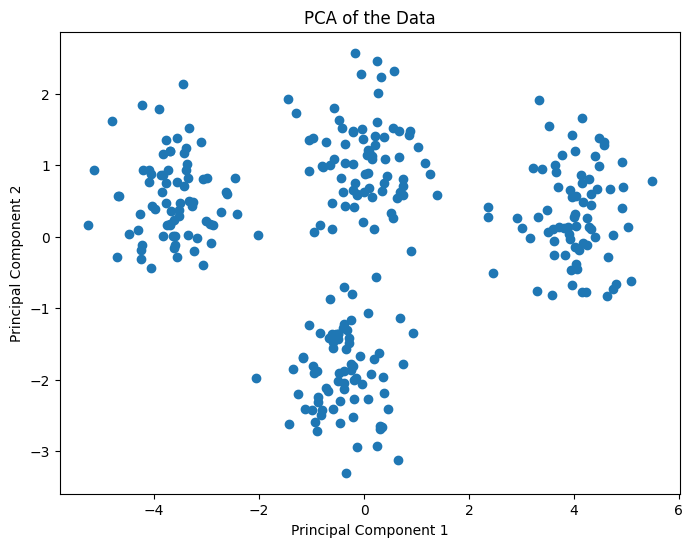

The percentage of variance explained by each of the selected components is [0.82502263 0.17497737]


In [18]:
#generate PCA and plot the result
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'X' is already defined in your notebook
# Create PCA object to reduce to 2 components
pca = PCA(n_components=2)

# Fit PCA to data
pca.fit(X)

# Transform the data to the new components
X_pca = pca.transform(X)

# Plotting the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of the Data")
plt.show()

#Explain variance
print(f"The percentage of variance explained by each of the selected components is {pca.explained_variance_ratio_}")

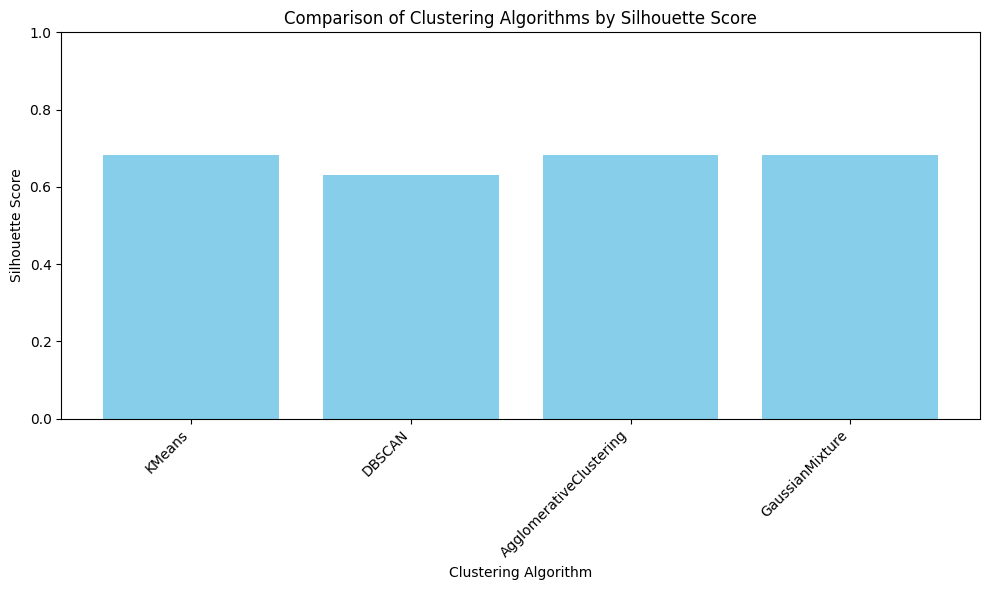

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'comparison_table' DataFrame is already created
# Comparison table
data = {"Algorithm": [], "Silhouette Score": []}
for name, result in results.items():
    data["Algorithm"].append(name)
    data["Silhouette Score"].append(result["silhouette_score"])

comparison_table = pd.DataFrame(data)
comparison_table
# Extract data
algorithms = comparison_table["Algorithm"]
silhouette_scores = comparison_table["Silhouette Score"]

# Create bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(algorithms, silhouette_scores, color="skyblue")

# Customize the graph
plt.xlabel("Clustering Algorithm")
plt.ylabel("Silhouette Score")
plt.title("Comparison of Clustering Algorithms by Silhouette Score")
plt.ylim(0, 1)  # set y-axis limits
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability
plt.tight_layout()

# Show the graph
plt.show()